# Importing libraries

In [1]:
import pandas as pd


# Load data

In [2]:
kickstarter_df = pd.read_csv("./inputs/kickstarter_data_full.csv", low_memory=False)


# Drop unnecessary columns

In [3]:
kickstarter_df.drop(columns=["index", "Unnamed: 0"], inplace=True)


# Naive feature selection

In [4]:
kickstarter_df.drop(columns="id", inplace=True)


In [5]:
kickstarter_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   photo                        20632 non-null  object 
 1   name                         20632 non-null  object 
 2   blurb                        20626 non-null  object 
 3   goal                         20632 non-null  float64
 4   pledged                      20632 non-null  float64
 5   state                        20632 non-null  object 
 6   slug                         20632 non-null  object 
 7   disable_communication        20632 non-null  bool   
 8   country                      20632 non-null  object 
 9   currency                     20632 non-null  object 
 10  currency_symbol              20632 non-null  object 
 11  currency_trailing_code       20632 non-null  bool   
 12  deadline                     20632 non-null  object 
 13  state_changed_at

# Remove features with more that 50% missing values

In [6]:
kickstarter_df.drop(
    columns=["friends", "is_starred", "is_backing", "permissions"], inplace=True
)


# Remove features with zero variance

In [7]:
kickstarter_df.nunique()[kickstarter_df.nunique() == 1]


Series([], dtype: int64)

# Check rows with missing values

In [8]:
kickstarter_df.isnull().any(axis=1).sum()

1937

In [9]:
kickstarter_df[kickstarter_df.isnull().any(axis=1)]

,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
120,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Ciervos - Electronic Band's 1st Album,Denlin is looking for the funding to create hi...,2000.0,85.0,failed,ciervos-electronic-bands-1st-album,False,US,USD,...,35 days 00:00:00.000000000,35 days 00:00:02.000000000,0,35,35,0,1,1,0,1
121,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",renegadedrum.bandcamp.com,renegadedrum.bandcamp.com,2000.0,182.0,failed,100-native-american-dance-music-walk-in-beauty-lp,False,US,USD,...,32 days 14:31:34.000000000,32 days 14:31:34.000000000,8,32,32,0,1,1,0,0
122,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Pax's Puppyprints,A compilation of meditative music that transce...,2500.0,0.0,failed,paxs-puppyprints,False,US,USD,...,7 days 00:00:00.000000000,7 days 00:00:00.000000000,12,7,7,0,1,1,0,0
123,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Life Is Heller - Me In A Bubble,"Help us get our debut album ""Me In A Bubble"" p...",3500.0,30.0,failed,life-is-heller-me-in-a-bubble,False,US,USD,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,4,30,30,0,1,1,0,0
124,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Let's remix Video Game Music for the Dance Flo...,Zencha looks to make a progressive house album...,3500.0,983.0,failed,emotional-sincere-inspiring-progressive-house-...,False,US,USD,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,12,30,30,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,"{""small"":""https://ksr-ugc.imgix.net/assets/015...",AreoX Piro Smartphone And GoPro Stabiliser | E...,AreoX Piro - Capture smooth cinematic videos w...,25000.0,204.0,suspended,areox-piro-smartphone-and-gopro-stabiliser-end...,True,GB,GBP,...,19 days 13:11:15.000000000,1 days 17:16:05.000000000,1,19,1,0,1,1,1,0
19580,"{""small"":""https://ksr-ugc.imgix.net/assets/013...",Sport X1 stabilizer for action camera & smartp...,Sport X1. New design professional stabilizer s...,500.0,3961.0,suspended,sport-x1-stabilizer-for-action-camera-and-smar...,True,NL,EUR,...,23 days 00:00:00.000000000,5 days 01:39:17.000000000,4,23,5,0,0,0,0,0
19581,"{""small"":""https://ksr-ugc.imgix.net/assets/013...",World's most intelligent stabilizer for smartp...,World's most intelligent hand-held 2 axis pock...,7000.0,982.0,suspended,worlds-most-intelligent-stabilizer-for-smartph...,True,NL,EUR,...,35 days 00:00:00.000000000,5 days 17:11:14.000000000,4,35,5,0,0,0,0,0
19582,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","Omnipod - Any Camera, Every Moment (Suspended)",Omnipod is the ultimate photographers rig. A ...,16030.0,4375.0,suspended,omnipod-any-camera-every-moment-0,True,US,USD,...,21 days 00:00:00.000000000,9 days 20:09:39.000000000,75,21,9,0,1,1,1,0


# Handle missing values

In [10]:
kickstarter_df.dropna(inplace=True)

In [11]:
kickstarter_df.reset_index(drop=True, inplace=True)

In [12]:
kickstarter_df.isnull().any(axis=1).sum()

0

# Check the cases of the "state" (dependent) variable

In [13]:
kickstarter_df["state"].value_counts()

state
failed        10541
successful     5210
canceled       2272
live            465
suspended       207
Name: count, dtype: int64

# Encode the "state" variable

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()

In [16]:
kickstarter_df_encoded = kickstarter_df.copy()

In [17]:
kickstarter_df_encoded["state"] = label_encoder.fit_transform(
    kickstarter_df_encoded["state"]
)

In [18]:
label_encoder.classes_

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [19]:
label_encoder.inverse_transform([0, 1, 2, 3, 4])

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [20]:
kickstarter_df_encoded["state"].value_counts()

state
1    10541
3     5210
0     2272
2      465
4      207
Name: count, dtype: int64

# Hyphotesis 1: Is features like "goal"and "pleded" associatet with successness?

In [21]:
h1_df = kickstarter_df_encoded[
    ["goal", "pledged", "usd_pledged", "static_usd_rate", "state"]
]


# Convert to USD

In [22]:
def covert_to_usd(row):
    return (
        row["goal"] * row["static_usd_rate"]
        if row["static_usd_rate"] != 1
        else row["goal"]
    )


In [23]:
h1_df["usd_pledged"] = h1_df.apply(covert_to_usd, axis=1)

C:\Users\Avidan.DESKTOP-RGG0UVA\AppData\Local\Temp\ipykernel_3200\244741806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1_df["usd_pledged"] = h1_df.apply(covert_to_usd, axis=1)


# Remove unnecessary columns

In [24]:
h1_df.drop(columns=["goal", "static_usd_rate"], inplace=True)

C:\Users\Avidan.DESKTOP-RGG0UVA\AppData\Local\Temp\ipykernel_3200\3230915881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1_df.drop(columns=["goal", "static_usd_rate"], inplace=True)


In [25]:
h1_df

,pledged,usd_pledged,state
0,0.0,1500.000000,1
1,0.0,500.000000,1
2,120.0,100000.000000,1
3,0.0,5000.000000,1
4,356.0,3591.284600,1
...,...,...,...
18690,25868.0,32522.863425,1
18691,1559.0,105479.669000,1
18692,0.0,10000.000000,1
18693,0.0,2500.000000,1


# Split into X and y

In [26]:
X = h1_df.drop(columns="state")
y = h1_df["state"]

# Split into train and test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression

# Define a model

In [30]:
logistic_regression_model = LogisticRegression()

# Fit the model

In [31]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

# Predict on test set

In [32]:
predictions = logistic_regression_model.predict(X_test)

In [33]:
predictions = label_encoder.inverse_transform(predictions)

In [34]:
test_results = pd.DataFrame({"Actual": y_test, "Predicted": predictions})

# Results

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()

ValueError: Mix of label input types (string and number)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(predictions)))

              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00       539
      failed       0.78      0.99      0.87      2646
        live       0.00      0.00      0.00       113
  successful       0.94      0.93      0.93      1329
   suspended       0.00      0.00      0.00        47

    accuracy                           0.82      4674
   macro avg       0.34      0.38      0.36      4674
weighted avg       0.71      0.82      0.76      4674



c:\Users\Avidan.DESKTOP-RGG0UVA\Desktop\Personal\final-project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Avidan.DESKTOP-RGG0UVA\Desktop\Personal\final-project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Avidan.DESKTOP-RGG0UVA\Desktop\Personal\final-project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

# Try the model with only faild and success

In [ ]:
{i: label_encoder.inverse_transform([i])[0] for i in range(5)}

{0: 'canceled', 1: 'failed', 2: 'live', 3: 'successful', 4: 'suspended'}

In [ ]:
h1_df_binary = h1_df.copy()

## Convert the values of state to be 1 if it in "successful" or "live" by their encided values 3, 2

In [ ]:
def convert_to_binary(row):
    return 1 if row["state"] in [3, 2] else 0

In [ ]:
h1_df_binary["state"] = h1_df_binary.apply(convert_to_binary, axis=1)

In [ ]:
h1_df_binary["state"].value_counts()

state
0    13020
1     5675
Name: count, dtype: int64

# Split into X and y again

In [ ]:
X_binary = h1_df_binary.drop(columns="state")
y_binary = h1_df_binary["state"]

# Split into train and test again

In [ ]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42
)

# Define a new model

In [ ]:
logistic_regression_model_binary = LogisticRegression()

# Fit the new model

In [ ]:
logistic_regression_model_binary.fit(X_train_binary, y_train_binary)

LogisticRegression()

# Predict and results

In [ ]:
logistic_regression_model_binary.score(X_test_binary, y_test_binary)

0.9471544715447154

In [ ]:
predictions_binary = logistic_regression_model_binary.predict(X_test_binary)

In [ ]:
test_results_binary = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_binary}
)

In [ ]:
test_results_binary

,Actual,Predicted
2301,1,1
7589,0,0
251,0,0
6315,0,0
4870,0,0
...,...,...
925,1,1
13377,0,0
18622,0,0
16975,0,1


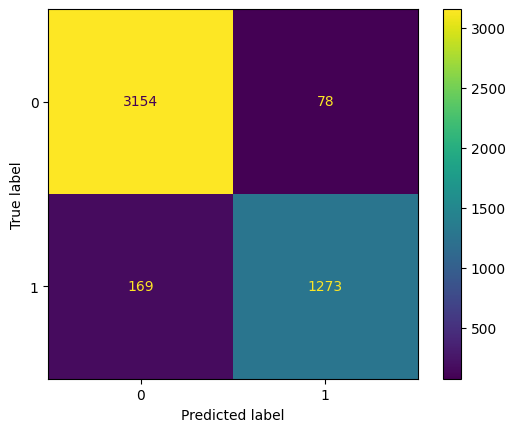

In [ ]:
cm = confusion_matrix(y_test_binary, predictions_binary)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test_binary, predictions_binary))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3232
           1       0.94      0.88      0.91      1442

    accuracy                           0.95      4674
   macro avg       0.95      0.93      0.94      4674
weighted avg       0.95      0.95      0.95      4674

